In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import *

from sklearn.model_selection import train_test_split

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Define the folder where all the images are there
folder = '../input/face-attributes-ml-thon-2021/images/images/'

# Reading the train data
train = pd.read_csv('../input/face-attribute-ml-thon/face_attribute_train.csv')


In [6]:
train.head()

,image_id,Wearing_Accessories,Thick_Lips_Nose
0,10479370.jpg,0,1
1,11904981.jpg,0,1
2,11284116.jpg,1,0
3,11904562.jpg,0,1
4,12137537.jpg,0,0


In [7]:
train_df, val_df = train_test_split(train, test_size=0.1)

In [9]:
datagen = ImageDataGenerator(rescale=1./255.)

columns = ['Wearing_Accessories', 'Thick_Lips_Nose']
print("Running.")

train_generator =     datagen.flow_from_dataframe(train_df, 
                                                    folder, 
                                                    x_col = 'image_id', 
                                                    y_col = columns, 
                                                    class_mode='raw',
                                                    target_size=(218, 178), 
                                                    batch_size = 128, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)
print("Running..")

val_generator =   datagen.flow_from_dataframe(val_df, 
                                                    folder, 
                                                    x_col = 'image_id', 
                                                    y_col = columns, 
                                                    target_size =(218, 178), 
                                                    class_mode = 'raw', 
                                                    batch_size = 128, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

Running.
Found 154979 validated image filenames.
Running..
Found 17220 validated image filenames.


In [10]:
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
from keras.models import Sequential

# MODEL
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(218,178,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(218, 178, 3)),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(2, activation='sigmoid')
# ])

In [11]:
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),
              loss="binary_crossentropy",
              metrics=["accuracy"])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

In [13]:
history = model.fit(train_generator,
              steps_per_epoch=STEP_SIZE_TRAIN,
              validation_data = val_generator,
              validation_steps=STEP_SIZE_VALID,
              epochs=18,
              verbose = True)

Epoch 1/18
1210/1210 [==============================] - 1253s 1s/step - loss: 0.6627 - accuracy: 0.4992 - val_loss: 0.5905 - val_accuracy: 0.5002
Epoch 2/18
1210/1210 [==============================] - 582s 481ms/step - loss: 0.5777 - accuracy: 0.5589 - val_loss: 0.5647 - val_accuracy: 0.6198
Epoch 3/18
1210/1210 [==============================] - 569s 470ms/step - loss: 0.5526 - accuracy: 0.5717 - val_loss: 0.5397 - val_accuracy: 0.5868
Epoch 4/18
1210/1210 [==============================] - 579s 478ms/step - loss: 0.5364 - accuracy: 0.5810 - val_loss: 0.5341 - val_accuracy: 0.5717
Epoch 5/18
1210/1210 [==============================] - 575s 475ms/step - loss: 0.5240 - accuracy: 0.5839 - val_loss: 0.5279 - val_accuracy: 0.5521
Epoch 6/18
1210/1210 [==============================] - 572s 473ms/step - loss: 0.5119 - accuracy: 0.5880 - val_loss: 0.5233 - val_accuracy: 0.5947
Epoch 7/18
1210/1210 [==============================] - 549s 454ms/step - loss: 0.5031 - accuracy: 0.5936 - val_lo

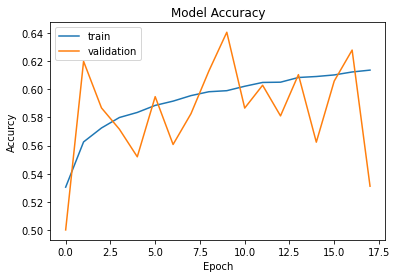

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accurcy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
sub = pd.read_csv("../input/face-attributes-ml-thon-2021/sampleSubmission.csv")
sub

,image_id,Wearing_Accessories,Thick_Lips_Nose
0,11580930.jpg,0,0
1,11433558.jpg,0,0
2,11423635.jpg,0,0
3,10623617.jpg,0,0
4,10020515.jpg,0,0
...,...,...,...
30395,10565840.jpg,0,0
30396,11930069.jpg,0,0
30397,11721443.jpg,0,0
30398,11346729.jpg,0,0


In [16]:
test_generator =   datagen.flow_from_dataframe(sub, folder, x_col = 'image_id', y_col=None,
    batch_size=128,
    class_mode=None,
    target_size =(218, 178),  
    shuffle=False,
    color_mode = 'rgb')

Found 30400 validated image filenames.


In [17]:
preds = model.predict(test_generator)

In [18]:
sub[['Wearing_Accessories', 'Thick_Lips_Nose']] = preds
sub

,image_id,Wearing_Accessories,Thick_Lips_Nose
0,11580930.jpg,0.998133,0.552102
1,11433558.jpg,0.002396,0.687783
2,11423635.jpg,0.481181,0.587477
3,10623617.jpg,0.006155,0.539405
4,10020515.jpg,0.759049,0.398264
...,...,...,...
30395,10565840.jpg,0.325312,0.648668
30396,11930069.jpg,0.014986,0.046568
30397,11721443.jpg,0.098750,0.246347
30398,11346729.jpg,0.095327,0.223790


In [19]:
sub.to_csv("submission2.csv", index=False)